In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/day_patients.csv')
df

,DATE_SERV,HOSPCODE,COUNT
0,2015-01-01,106xx,310
1,2015-01-01,108xx,79
2,2015-01-02,106xx,331
3,2015-01-02,108xx,76
4,2015-01-03,106xx,300
...,...,...,...
2915,2018-12-29,108xx,82
2916,2018-12-30,106xx,350
2917,2018-12-30,108xx,62
2918,2018-12-31,106xx,382


> hospcode คือรหัสโรงพยาบาล

> count คือ รหัส ที่เข้ารับบริการ


<hr>

* workshop โดยต้องการคาดการณ์ว่าในอนาคต จะมีคนไข้มาใช้บริการอะไร อย่างไรบ้าง

## ตรวจสอบประเภทข้อมูลในแต่ละคอลัมน์


In [3]:
df.info() # ดูว่าข้อมูลมีอะไรบ้าง

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE_SERV  2920 non-null   object
 1   HOSPCODE   2920 non-null   object
 2   COUNT      2920 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 68.6+ KB


> int64 = ประเภทตัวเลข

> object = ประเภทข้อความ

In [4]:
# ดูคอลัมน์ เพื่อแปลง โดยระบุ format ตามตารางด้านบน หรือ อยากได้แบบไหนปรับเอา

df['DATE_SERV'] = pd.to_datetime(df['DATE_SERV'], format='%Y-%m-%d')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE_SERV  2920 non-null   datetime64[ns]
 1   HOSPCODE   2920 non-null   object        
 2   COUNT      2920 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 68.6+ KB


## เลือกข้อมูล และคำนวณหาผลรวมแบบรายเดือน

In [6]:
# เลือกข้อมูล และผลรวมรายเดือน
df = df[df['HOSPCODE'] == '108xx']
df['MONTH_YEAR'] = df['DATE_SERV'].dt.to_period('M')
df = df[['MONTH_YEAR', 'COUNT']].groupby('MONTH_YEAR').sum()
df

<ipython-input-6-267397663dc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH_YEAR'] = df['DATE_SERV'].dt.to_period('M')


,COUNT
MONTH_YEAR,
2015-01,6743
2015-02,6979
2015-03,6841
2015-04,6653
2015-05,6710
2015-06,7272
2015-07,7679
2015-08,8117
2015-09,8275


In [7]:
#  สร้างคอลัมน์ใหม่

#df['MONTH_YEAR'] = df['DATE_SERV'].dt.to_period('M')

In [8]:
# ดูผลรวมคนไข้รายเดือน

#df[['MONTH_YEAR', 'COUNT']].groupby('MONTH_YEAR').sum()

In [9]:
#df

## แสดงแผนภูมิเส้นของข้อมูลอนุกรมเวลารายเดือน

<AxesSubplot:xlabel='MONTH_YEAR'>

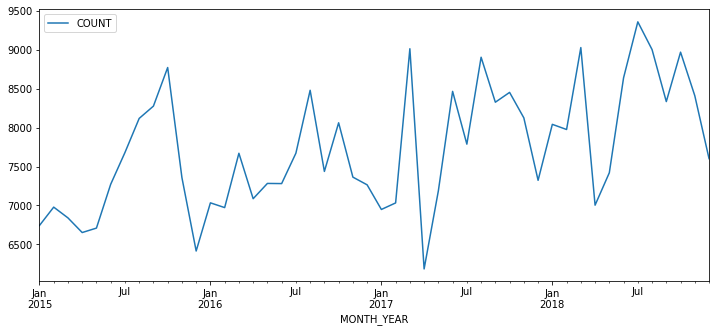

In [10]:
# ดูภาพรวมคนไข้ในแต่ละเดือน

import matplotlib.pyplot as plt
df.plot.line(figsize=(12, 5))

In [11]:
#conda install -c conda-forge statsmodels

## ทดสอบ stationarity (ความนิ่งของข้อมูล) ด้วย Dickey–Fuller test

In [12]:
from statsmodels.tsa.stattools import adfuller

adfTest = adfuller(df['COUNT'], autolag='AIC')
pValue = adfTest[1]
pValue # less than 0.5 = stationary

0.0001629924905935434

## แบ่งข้อมูล Train (2015-2017) และ Test (2018)

* เตรียมข้อมูลเพื่อนำไป train

แบ่ง
3 ปีแรก เป็นส่วนของการ Train 

ปี 2018 test

In [13]:
df_train = df.loc['2015-01':'2017-12']
df_test = df.loc['2018-01':'2018-12']
df_train, df_test

(            COUNT
 MONTH_YEAR       
 2015-01      6743
 2015-02      6979
 2015-03      6841
 2015-04      6653
 2015-05      6710
 2015-06      7272
 2015-07      7679
 2015-08      8117
 2015-09      8275
 2015-10      8770
 2015-11      7358
 2015-12      6416
 2016-01      7034
 2016-02      6973
 2016-03      7670
 2016-04      7087
 2016-05      7283
 2016-06      7281
 2016-07      7671
 2016-08      8478
 2016-09      7437
 2016-10      8061
 2016-11      7364
 2016-12      7265
 2017-01      6949
 2017-02      7033
 2017-03      9011
 2017-04      6186
 2017-05      7188
 2017-06      8464
 2017-07      7787
 2017-08      8902
 2017-09      8325
 2017-10      8451
 2017-11      8124
 2017-12      7323,
             COUNT
 MONTH_YEAR       
 2018-01      8041
 2018-02      7975
 2018-03      9026
 2018-04      7004
 2018-05      7420
 2018-06      8638
 2018-07      9356
 2018-08      9000
 2018-09      8333
 2018-10      8967
 2018-11      8408
 2018-12      7601)

In [14]:

# df_train
# df_test

## เทรนแบบจำลอง SARIMAX 

* (Seasonal Auto Regressive Integrated Moving Average with Exogenous factors)

In [15]:
import statsmodels.api as sm

np.random.seed(101) # seed คือสุ่มให้ได้ค่าเดิมทุกครั้งเวลารัน
model = sm.tsa.statespace.SARIMAX(df_train['COUNT'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit() # เพื่อจะทดสอบ train test model

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


## ทดสอบแบบจำลองด้วยการ forecast ปี 2018

* ทดสอบแบบจำลองด้วยการ forecast ปี 2018 (จากเดือน 1-12)

In [16]:
start_index='2018-01'
end_index='2018-12'
forecast = model_fit.predict(start=start_index, end=end_index, dynamic=True)

In [17]:
forecast

2018-01    7372.061160
2018-02    7438.253293
2018-03    9416.593994
2018-04    6592.265081
2018-05    7594.028085
2018-06    8869.808807
2018-07    8193.095314
2018-08    9307.902955
2018-09    8731.109082
2018-10    8857.114781
2018-11    8529.903193
2018-12    7728.793795
Freq: M, Name: predicted_mean, dtype: float64

In [18]:
df

,COUNT
MONTH_YEAR,
2015-01,6743
2015-02,6979
2015-03,6841
2015-04,6653
2015-05,6710
2015-06,7272
2015-07,7679
2015-08,8117
2015-09,8275


In [19]:
# หาค่า MSE

from sklearn.metrics import mean_absolute_error
print('MSE:', mean_absolute_error(df_test, forecast))

MSE: 386.862523440091


## แสดงผลการ Forecast เปรียบเทียบกับข้อมูล Test

In [20]:
# นำค่าที่ forecast มา เปรียบเทียบกับค่าที่เกิดขึ้นจริง
df_forecast = df.copy()
df_forecast['FORECAST'] = forecast
df_forecast.column = ['ACTUAL', 'FORECAST'] # คอลัมจริงกับค่าคาดการณ์
df_forecast

<ipython-input-20-7803c3c546ce>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_forecast.column = ['ACTUAL', 'FORECAST'] # คอลัมจริงกับค่าคาดการณ์


,COUNT,FORECAST
MONTH_YEAR,,
2015-01,6743,NaN
2015-02,6979,NaN
2015-03,6841,NaN
2015-04,6653,NaN
2015-05,6710,NaN
2015-06,7272,NaN
2015-07,7679,NaN
2015-08,8117,NaN
2015-09,8275,NaN


## แสดงผลการ Forecast เปรียบเทียบกับข้อมูล Test

<AxesSubplot:xlabel='MONTH_YEAR'>

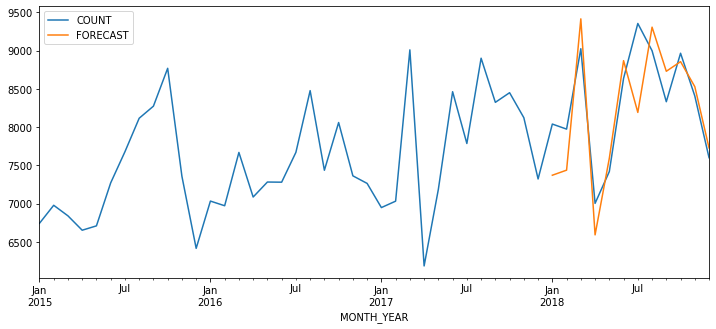

In [21]:
df_forecast.plot(figsize=(12,5))

## แสดงผลการ Forecast ปีถัดไป (2019)

In [22]:
start_index = '2019-01'
end_index = '2020-12'
forecast = model_fit.predict(start=start_index, end=end_index, dynamic= True)
forecast

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2019-01     7778.126958
2019-02     7844.392228
2019-03     9822.197619
2019-04     6998.582124
2019-05     8000.106237
2019-06     9275.667980
2019-07     8599.240735
2019-08     9713.856187
2019-09     9137.268258
2019-10     9263.279650
2019-11     8935.856662
2019-12     8134.637963
2020-01     8184.242888
2020-02     8250.581231
2020-03    10227.851787
2020-04     7404.949076
2020-05     8406.234511
2020-06     9681.577469
2020-07     9005.436217
2020-08    10119.859651
2020-09     9543.477484
2020-10     9669.494564
2020-11     9341.860364
2020-12     8540.532461
Freq: M, Name: predicted_mean, dtype: float64

## แสดงผลการ Forecast ปีถัดไป (2020)

In [23]:
df_forecast = pd.concat([df, forecast])
df_forecast.columns = ['ACTUAL', 'FORCAST']
df_forecast

,ACTUAL,FORCAST
2015-01,6743.0,NaN
2015-02,6979.0,NaN
2015-03,6841.0,NaN
2015-04,6653.0,NaN
2015-05,6710.0,NaN
...,...,...
2020-08,NaN,10119.859651
2020-09,NaN,9543.477484
2020-10,NaN,9669.494564
2020-11,NaN,9341.860364


## แสดงผลการ Forecast เปรียบเทียบกับข้อมูล Test

<AxesSubplot:>

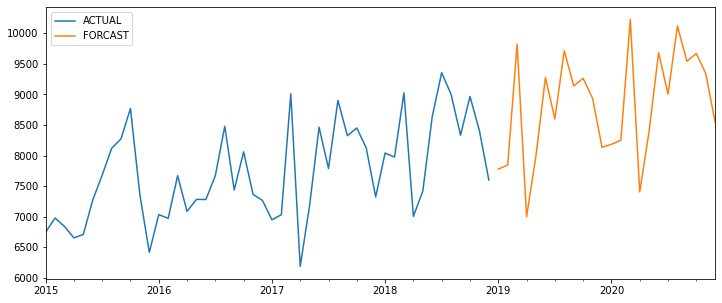

In [24]:
df_forecast.plot(figsize=(12,5))